In [2]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.torch_core import *
from fastai.callback import *
from fastai.basic_train import *
import torchvision.models as tmodels

import pandas as pd
import numpy as np
import os
from tqdm import tqdm
# from sklearn.metrics import accuracy_score
# from scipy.misc import imsave

# from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.model_selection import cross_val_score


import torchvision

import os
import sys

sys.path.insert(0, '/home/santhosr/Documents/Birad/FastAI/RaceClassification/' )

from utils import *

from birad import *
from birad import setTruthFile, getRaceLabel


inputFolder1 = '/home/santhosr/Documents/Birad/ProcessedData/FullRes'
truthFile1 = '/home/santhosr/Documents/Birad/birad_targetFile.csv'

inputFolder2 = '/home/santhosr/Documents/Birad/ProcessedData/PennExtra_3500/'
truthFile2 = '/home/santhosr/Documents/Birad/RaceDL_ExtraCaucasian.csv'

df1 = pd.read_csv('/home/santhosr/Documents/Birad/birad_targetFile.csv')
df1.drop(['PresIntentType','DBT'],inplace = True,axis=1)


df2 = pd.read_csv('/home/santhosr/Documents/Birad/RaceDL_ExtraCaucasian.csv')
df2.Medview_Race = 'White'
truth = pd.concat([df1,df2],sort=True)

setTruthFile(truth)

dfFile = "/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/DataFile10.csv"

modelName = 'model_resnet50_id10_acc833_loss386'


#Feature Directories
trainFolder = '/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/Features/model9_2/train'

validFolder = '/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/Features/model9_2/valid'

In [9]:
df = pd.read_csv(dfFile)

d = pd.concat([df[df.train==True].iloc[0:100], df[df.train==False].iloc[0:100], ])

In [10]:
d

,DummyID,filename,train
5,75048084,FullRes/2/75048084_R_CC_1.jpg,True
14,76876308,FullRes/2/76876308_R_MLO_1.jpg,True
18,76750724,PennExtra_3500/76750724_FOR-PROCESSING_L_CC_1.jpg,True
37,76809071,FullRes/1/76809071_R_CC_1.jpg,True
50,75352509,FullRes/2/75352509_L_MLO_1.jpg,True
51,75225607,FullRes/2/75225607_L_CC_1.jpg,True
56,75821525,FullRes/3/75821525_L_CC_1.jpg,True
58,3027487,FullRes/3/3027487_L_MLO_1.jpg,True
59,76779721,FullRes/2/76779721_L_CC_1.jpg,True
64,75476406,PennExtra_3500/75476406_FOR-PROCESSING_L_CC_1.jpg,True


In [11]:
#Creates the FastAI Dataset
data = ImageItemList.from_df(df=d,path='/home/santhosr/Documents/Birad/ProcessedData/', cols='filename').split_from_df(col='train').label_from_func(getRaceLabel).transform(get_transforms(),size=256).databunch(bs=50).normalize()
print("Dataset created")

You can deactivate this warning by passing `no_check=True`.


/home/santhosr/.local/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/santhosr/.local/lib/python3.6/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [33, 56, 40, 22, 5, 90, 60, 92, 81, 0, 32, 57, 70, 78, 36, 9, 68, 61, 46, 82, 63, 45, 15, 62, 75, 26, 86, 74, 23, 93, 20, 30, 99, 1, 21, 79, 72, 16, 71, 50, 77, 13, 29, 48, 38, 69, 43, 76, 8, 73]
  warn(f"There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in {idx}")
/home/santhosr/.local/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid b

RuntimeError: DataLoader worker (pid(s) 3772) exited unexpectedly

/home/santhosr/.local/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/santhosr/.local/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/santhosr/.local/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desi

##### Loading the model

In [11]:
#Creates the model architecture 
learn = create_cnn(data, tmodels.resnet50, metrics=accuracy,pretrained=True)

learn.load('/home/santhosr/Documents/Birad/ProcessedData/models/'+modelName)



Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (100 items)
[Category 0, Category 1, Category 0, Category 1, Category 0]...
Path: /home/santhosr/Documents/Birad/ProcessedData
x: ImageItemList (100 items)
[Image (3, 3328, 2560), Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560), Image (3, 3328, 2560)]...
Path: /home/santhosr/Documents/Birad/ProcessedData;

Valid: LabelList
y: CategoryList (100 items)
[Category 1, Category 1, Category 1, Category 0, Category 0]...
Path: /home/santhosr/Documents/Birad/ProcessedData
x: ImageItemList (100 items)
[Image (3, 4096, 3328), Image (3, 4096, 3328), Image (3, 3328, 2560), Image (3, 4096, 3328), Image (3, 3328, 2560)]...
Path: /home/santhosr/Documents/Birad/ProcessedData;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
 

In [7]:
for name, child in learn.model.named_children():
       
        for name2, params in child.named_parameters():
            print(name+"."+name2)

0.0.weight
0.1.weight
0.1.bias
0.4.0.conv1.weight
0.4.0.bn1.weight
0.4.0.bn1.bias
0.4.0.conv2.weight
0.4.0.bn2.weight
0.4.0.bn2.bias
0.4.0.conv3.weight
0.4.0.bn3.weight
0.4.0.bn3.bias
0.4.0.downsample.0.weight
0.4.0.downsample.1.weight
0.4.0.downsample.1.bias
0.4.1.conv1.weight
0.4.1.bn1.weight
0.4.1.bn1.bias
0.4.1.conv2.weight
0.4.1.bn2.weight
0.4.1.bn2.bias
0.4.1.conv3.weight
0.4.1.bn3.weight
0.4.1.bn3.bias
0.4.2.conv1.weight
0.4.2.bn1.weight
0.4.2.bn1.bias
0.4.2.conv2.weight
0.4.2.bn2.weight
0.4.2.bn2.bias
0.4.2.conv3.weight
0.4.2.bn3.weight
0.4.2.bn3.bias
0.5.0.conv1.weight
0.5.0.bn1.weight
0.5.0.bn1.bias
0.5.0.conv2.weight
0.5.0.bn2.weight
0.5.0.bn2.bias
0.5.0.conv3.weight
0.5.0.bn3.weight
0.5.0.bn3.bias
0.5.0.downsample.0.weight
0.5.0.downsample.1.weight
0.5.0.downsample.1.bias
0.5.1.conv1.weight
0.5.1.bn1.weight
0.5.1.bn1.bias
0.5.1.conv2.weight
0.5.1.bn2.weight
0.5.1.bn2.bias
0.5.1.conv3.weight
0.5.1.bn3.weight
0.5.1.bn3.bias
0.5.2.conv1.weight
0.5.2.bn1.weight
0.5.2.bn1.bias
0

#### Porting FastAI model to PyTorch

In [10]:
t = torch.ones((1,3,224,224))
learn.model.eval()

learn.model(t.cuda())

tensor([[-0.0685,  0.5951]], device='cuda:0', grad_fn=<AddmmBackward>)

In [12]:
w = data.valid_ds.x[0]

In [ ]:
w.process

In [12]:
data = w.data
data = data.view(-1, data.size())

TypeError: view(): argument 'size' must be tuple of ints, but found element of type torch.Size at pos 2

In [15]:
data.valid_ds.tfms

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={'padding_mode': 'reflection', 'row_pct': 0.5, 'col_pct': 0.5}, do_run=True, is_random=True)]

In [11]:
r = data.valid_dl.x[0].data == data.valid_ds.x[0].data

In [15]:
data.valid_dl.tfms

[functools.partial(<function _normalize_batch at 0x7fa6bba40950>, mean=tensor([0.7601, 0.7601, 0.7601]), std=tensor([0.3307, 0.3307, 0.3307]), do_x=True, do_y=False)]

In [8]:
learn.predict(data.valid_dl.x[0])

(Category 1, tensor(1), tensor([0.0057, 0.9943]))

In [16]:
sample = data.valid_dl.x[0].data

sample = torchvision.transforms.Resize((256,256))(sample)

sample.shape

TypeError: img should be PIL Image. Got <class 'torch.Tensor'>

In [13]:
learn.model(data.valid_dl.x[0].data.unsqueeze(0).cuda())

RuntimeError: CUDA out of memory. Tried to allocate 832.00 MiB (GPU 0; 10.91 GiB total capacity; 9.80 GiB already allocated; 369.69 MiB free; 3.69 MiB cached)

In [10]:
data.valid_dl.x[0].data

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [23]:
import pdb

In [45]:
pdb.run('learn.predict(data.valid_dl.x[0])')

> <string>(1)<module>()
(Pdb) s
--Call--
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/basic_data.py(35)__getattr__()
-> def __getattr__(self,k:str)->Any: return getattr(self.dl, k)
(Pdb) n
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/basic_data.py(35)__getattr__()
-> def __getattr__(self,k:str)->Any: return getattr(self.dl, k)
(Pdb) n
--Return--
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/basic_data.py(35)__getattr__()->ImageItemList.../ProcessedData
-> def __getattr__(self,k:str)->Any: return getattr(self.dl, k)
(Pdb) n
--Call--
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/data_block.py(92)__getitem__()
-> def __getitem__(self,idxs:int)->Any:
(Pdb) s
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/data_block.py(93)__getitem__()
-> idxs = try_int(idxs)
(Pdb) n
> /home/santhosr/.local/lib/python3.6/site-packages/fastai/data_block.py(94)__getitem__()
-> if isinstance(idxs, numbers.Integral): return self.get(idxs)
(Pdb) n

In [33]:
e = data.train_ds.x[0]

help(e)

Help on Image in module fastai.vision.image object:

class Image(fastai.core.ItemBase)
 |  Support applying transforms to image data in `px`.
 |  
 |  Method resolution order:
 |      Image
 |      fastai.core.ItemBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, px:torch.Tensor)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  affine(self, func:Callable[[Dict[str, Any]], torch.Tensor], *args, **kwargs) -> 'Image'
 |      Equivalent to `image.affine_mat = image.affine_mat @ func()`.
 |  
 |  apply_tfms(self, tfms:Union[Callable, Collection[Callable]], do_resolve:bool=True, xtra:Union[Dict[Callable, dict], NoneType]=None, size:Union[int, Tuple[int, int, int], NoneType]=None, resize_method:fastai.vision.image.ResizeMethod=<ResizeMethod.CROP: 1>, mult:int=32, padding_mode:str='reflection', mode:str='bilinear') -> torch.Tensor
 |      Apply all `tfms` to the `Image`, if `do_r

In [44]:
e.data

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [28]:
type(data.train_dl.x)

fastai.vision.data.ImageItemList

In [29]:
type(data.train_ds.x)

fastai.vision.data.ImageItemList

In [30]:
type(data.train_ds)

fastai.data_block.LabelList

In [31]:
type(data.train_dl)

fastai.basic_data.DeviceDataLoader

In [18]:
type(data.train_ds.x[0])

fastai.vision.image.Image

In [46]:
type(learn.data)

fastai.vision.data.ImageDataBunch

In [56]:
q=learn.data.one_item(data.valid_dl.x[0])

In [55]:
learn.model.eval()
nn.Softmaxlearn.model(q[0])

tensor([[-2.8241,  2.3344]], device='cuda:0', grad_fn=<AddmmBackward>)

In [57]:
learn.predict(data.valid_dl.x[0])

(Category 1, tensor(1), tensor([0.0057, 0.9943]))

In [21]:
import inspect
print(inspect.getmro(fastai.vision.image.Image))

(<class 'fastai.vision.image.Image'>, <class 'fastai.core.ItemBase'>, <class 'object'>)


In [22]:
print(inspect.getmro(fastai.core.ItemBase))

(<class 'fastai.core.ItemBase'>, <class 'object'>)


In [ ]:
a = Image()

#### Creating PredList

In [8]:
predList = []

for i in tqdm(range(len(data.valid_ds))):
    pred = learn.predict(data.valid_dl.x[i])
    predList.append(pred)

# help(learn.get_preds)

100%|██████████| 7552/7552 [29:14<00:00,  4.77it/s]


#### Creating Prediction File

In [9]:

predScores = []

for i in range(len(predList)):
    predScores.append([predList[i][2].numpy()[0],predList[i][2].numpy()[1]])

predLabels = []

for i in range(len(predList)):
    predLabels.append(int(predList[i][1].numpy()))

imageNames = []

for i in range(len(data.valid_ds)):
    imageNames.append( data.valid_ds.items[i].split("/")[-1].split(".")[0]  )


predDf = pd.DataFrame(predScores)
predDf.columns = ['score0','score1']

predDf['predLabel'] = predLabels

predDf['imageName'] = imageNames

predDf['truthLabel'] = predDf.imageName.apply(lambda x : getRaceLabel(x))

In [10]:
predDf.head()

,score0,score1,predLabel,imageName,truthLabel
0,0.005717,0.994283,1,75048084_R_CC_1,1
1,0.803633,0.196367,0,76876308_R_MLO_1,1
2,0.208912,0.791088,1,76750724_FOR-PROCESSING_L_CC_1,1
3,0.997835,0.002165,0,76809071_R_CC_1,0
4,0.929431,0.070569,0,75352509_L_MLO_1,0


In [11]:
accuracy_score(predDf.predLabel, predDf.truthLabel)

0.8334216101694916

In [12]:
predDf.to_csv('model10_1_Predictions.csv',index = False, index_label = False)

In [66]:
predDf.head()

,score0,score1,predLabel,ImageName,truthLabel,DummyID
0,0.005717,0.994283,1,75048084_R_CC_1,1,75048084
1,0.803633,0.196367,0,76876308_R_MLO_1,1,76876308
2,0.208912,0.791088,1,76750724_FOR-PROCESSING_L_CC_1,1,76750724
3,0.997835,0.002165,0,76809071_R_CC_1,0,76809071
4,0.929431,0.070569,0,75352509_L_MLO_1,0,75352509


In [73]:
predDf[predDf.DummyID==75923459]

,score0,score1,predLabel,ImageName,truthLabel,DummyID,BMI


In [74]:
set(predDf.DummyID.values).intersection(set(trainPredDf.DummyID.values))

set()

### Checking Predictions at BMI level

In [5]:
predDf = pd.read_csv('model10_1_Predictions.csv')

truth = truth.sort_values(['DummyID','BMI'])

truth = truth.drop_duplicates(subset=['DummyID'])

In [6]:
if 'imageName' in predDf.columns:
    predDf.rename(columns={'imageName':'ImageName'},inplace=True)
    
predDf['DummyID'] = predDf.ImageName.apply(lambda x : int(x.split("_")[0]))

In [7]:


predDf = pd.merge(predDf, truth[['DummyID','BMI']], on='DummyID',how='left')

#Removing samples which dont have BMI
predDf = predDf[~predDf.BMI.isnull()]

predDf.BMI.describe()

count    7552.000000
mean       27.504449
std         6.002899
min         2.700000
25%        23.400000
50%        26.600000
75%        29.800000
max        67.500000
Name: BMI, dtype: float64

(0, 80)

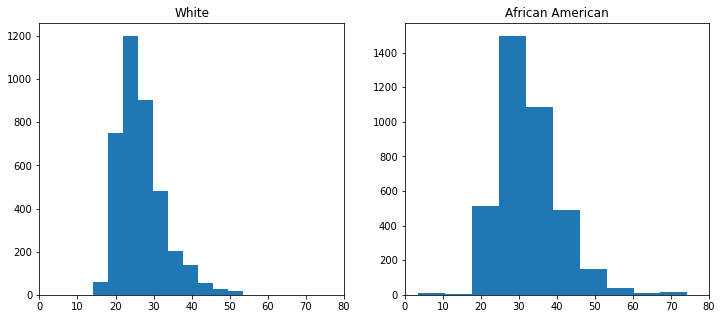

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("White")
plt.hist(predDf[predDf.truthLabel==1]['BMI'])
plt.xlim(0,80)

plt.subplot(122)
plt.title("African American")
plt.hist(predDf[predDf.truthLabel==0]['BMI'])
plt.xlim(0,80)


In [8]:
outputData = []
for i in range(8):
    bmi_min,bmi_max = 15 + 5*i, 15 + 5*(i+1)
    
    subDf = predDf[predDf.BMI.between(bmi_min,bmi_max)]
    
    whiteDf = subDf[subDf.truthLabel==1]
    aaDf = subDf[subDf.truthLabel==0]
    
    selectSize = min(len(whiteDf), len(aaDf))
    
    whiteDf = whiteDf[:selectSize]
    aaDf = aaDf[:selectSize]
    
    tempDf = pd.concat([whiteDf, aaDf])
    
    whiteAcc = np.round(accuracy_score(whiteDf.truthLabel, whiteDf.predLabel),2)
    aaAcc = np.round(accuracy_score(aaDf.truthLabel, aaDf.predLabel),2)
    
    acc = np.round(accuracy_score(tempDf.truthLabel,tempDf.predLabel),2)
    
    outputData.append([bmi_min, bmi_max, selectSize, acc, whiteAcc,aaAcc])


    
tempDf = pd.DataFrame(outputData)
tempDf.columns = ['BMI_min','BMI_max','numImages','Total Acc','White Acc','Black Acc']

tempDf[['BMI_min','BMI_max','Total Acc','White Acc','Black Acc']]
    
    
    
    

,BMI_min,BMI_max,Total Acc,White Acc,Black Acc
0,15,20,0.80,0.82,0.78
1,20,25,0.85,0.88,0.82
2,25,30,0.82,0.85,0.80
3,30,35,0.83,0.83,0.82
4,35,40,0.83,0.81,0.85
5,40,45,0.79,0.80,0.78
6,45,50,0.86,0.81,0.91
7,50,55,0.92,0.92,0.92


In [22]:
outputData = []
for i in range(8):
    bmi_min,bmi_max = 15 + 5*i, 15 + 5*(i+1)
    
    subDf = predDf[predDf.BMI.between(bmi_min,bmi_max)]
    
    whiteDf = subDf[subDf.truthLabel==1]
    aaDf = subDf[subDf.truthLabel==0]
        
    tempDf = pd.concat([whiteDf, aaDf])
    
    whiteAcc = np.round(accuracy_score(whiteDf.truthLabel, whiteDf.predLabel),2)
    aaAcc = np.round(accuracy_score(aaDf.truthLabel, aaDf.predLabel),2)
    
    acc = np.round(accuracy_score(tempDf.truthLabel,tempDf.predLabel),2)
    
    outputData.append([bmi_min, bmi_max, len(subDf), acc, whiteAcc,aaAcc])

    
tempDf = pd.DataFrame(outputData)
tempDf.columns = ['BMI_min','BMI_max','numImages','Total Acc','White Acc','Black Acc']

totalDiff = 0

for i in range(len(tempDf)):
    
    diff = np.abs(tempDf.iloc[i]['White Acc'] - tempDf.iloc[i]['Black Acc'])
    
    totalDiff += diff
    

biasScore = totalDiff/len(tempDf)
    
    
    
    

,BMI_min,BMI_max,numImages,Total Acc,White Acc,Black Acc
0,15,20,344,0.80,0.81,0.78
1,20,25,2504,0.87,0.89,0.82
2,25,30,3080,0.81,0.85,0.79
3,30,35,988,0.82,0.83,0.82
4,35,40,504,0.83,0.81,0.85
5,40,45,176,0.77,0.76,0.78
6,45,50,88,0.86,0.81,0.89
7,50,55,28,0.89,0.92,0.88


### Checking Predictions at Breast Volume level

In [37]:
volpara = pd.read_csv("VolparaResults.csv")
volpara.head()

,ImageName,DummyID,BreastSide,MammoView,BreastVolumeCm3,VolumetricBreastDensity,DenseAreaPercent,ComputedBreastThickness,MaximumPercentDensityIn1Cm2Area,MaximumDenseVolumeIn1Cm2AreaInCm3
0,2036311_L_CC_1,2036311,Left,CC,551.8933,5.2457,67.1112,62.0,16.3976,1.047380
1,2036311_L_MLO_1,2036311,Left,MLO,638.1189,10.5883,92.3699,63.0,25.2581,1.639360
2,2036311_R_CC_1,2036311,Right,CC,468.4220,4.6236,39.2641,56.0,14.5975,0.842166
3,2036311_R_MLO_1,2036311,Right,MLO,712.3350,7.1716,85.2747,70.0,20.8634,1.504580
4,2043167_L_CC_1,2043167,Left,CC,1441.5069,5.9439,33.3823,70.0,13.7715,0.993140


In [38]:
predDf = pd.merge(predDf, volpara[['ImageName','BreastVolumeCm3']], on='ImageName', how='left')

In [39]:
preCount = len(predDf)
predDf = predDf[~pd.isna(predDf.BreastVolumeCm3)]
print("Dropped {} rows with missing volume information".format(preCount - len(predDf)))

Dropped 262 rows with missing volume information


(array([ 567., 1211.,  920.,  518.,  243.,  123.,   79.,   32.,    8.,    7.]),
 array([  60.5711 ,  465.90718,  871.24326, 1276.57934, 1681.91542, 2087.2515 , 2492.58758, 2897.92366, 3303.25974,
        3708.59582, 4113.9319 ]),
 <a list of 10 Patch objects>)

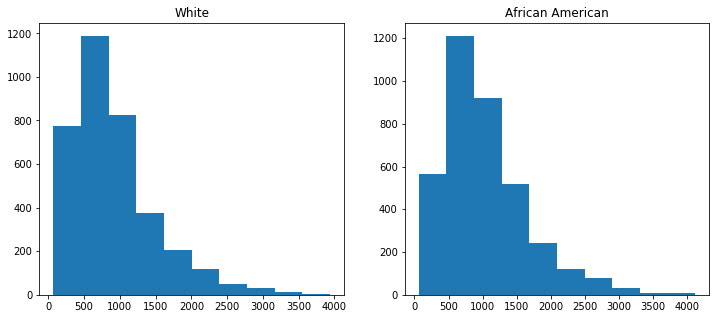

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("White")
plt.hist(predDf[predDf.truthLabel==1]['BreastVolumeCm3'])
# plt.xlim(0,80)

plt.subplot(122)
plt.title("African American")
plt.hist(predDf[predDf.truthLabel==0]['BreastVolumeCm3'])
# plt.xlim(0,80)


In [45]:
cuts = np.quantile(predDf.BreastVolumeCm3, [i/10 for i in range(11)])

In [46]:
len(cuts)

11

In [50]:
outputData = []
for i in range(10):
    bmi_min,bmi_max = cuts[i], cuts[i+1]
    
    subDf = predDf[predDf.BreastVolumeCm3.between(bmi_min,bmi_max)]
    
    whiteDf = subDf[subDf.truthLabel==1]
    aaDf = subDf[subDf.truthLabel==0]
    
    selectSize = min(len(whiteDf), len(aaDf))
    
    whiteDf = whiteDf[:selectSize]
    aaDf = aaDf[:selectSize]
    
    tempDf = pd.concat([whiteDf, aaDf])
    
    whiteAcc = np.round(accuracy_score(whiteDf.truthLabel, whiteDf.predLabel),2)
    aaAcc = np.round(accuracy_score(aaDf.truthLabel, aaDf.predLabel),2)
    
    acc = np.round(accuracy_score(tempDf.truthLabel,tempDf.predLabel),2)
    
    outputData.append([bmi_min, bmi_max, selectSize, acc, whiteAcc,aaAcc])


    
tempDf = pd.DataFrame(outputData)
tempDf.columns = ['BMI_min','BMI_max','numImages','Total Acc','White Acc','Black Acc']

tempDf
    
    

,BMI_min,BMI_max,numImages,Total Acc,White Acc,Black Acc
0,60.57110,350.53756,318,0.81,0.84,0.78
1,350.53756,481.92662,288,0.84,0.90,0.79
2,481.92662,600.76925,343,0.86,0.89,0.82
3,600.76925,719.84100,359,0.83,0.89,0.76
4,719.84100,843.49760,352,0.83,0.88,0.78
5,843.49760,984.14228,346,0.85,0.88,0.81
6,984.14228,1138.70128,337,0.83,0.85,0.81
7,1138.70128,1384.62894,324,0.81,0.80,0.83
8,1384.62894,1780.06990,299,0.85,0.82,0.88
9,1780.06990,4113.93190,316,0.83,0.78,0.88


In [51]:
tempDf.to_csv('VolumeBucket_Results.csv',index=False, index_label=False)

### Checking Predictions at Density Level

In [15]:
truthFile = '/home/santhosr/Documents/Birad/FastAI/RaceClassification/Final.csv'
truth1 = pd.read_csv(truthFile)

keepList = ['ImageName','VolumetricBreastDensity','DenseAreaPercent']
temp1 = truth1[keepList] 



# temp2 = pd.read_csv('/home/santhosr/Documents/Birad/Breast_density_data.csv')

# temp2['DenseAreaPercent'] = (temp2['DenseArea(sqcm)']/temp2['BreastArea(sqcm)'])*100

# temp2 = temp2[['File Analyzed' , 'DenseAreaPercent'] ]

# temp2.columns = ['ImageName','DenseAreaPercent']

/home/santhosr/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (65,66,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
predDf = pd.read_csv('model9_1_Predictions.csv')

In [17]:
predDf = predDf.merge(temp1, on='ImageName',how='left')




In [18]:
predDf = predDf[~pd.isna(predDf.DenseAreaPercent)]

In [9]:
len(predDf)

5636

(array([550., 631., 497., 406., 376., 342., 310., 338., 275., 147.]),
 array([2.568240e-02, 1.002311e+01, 2.002055e+01, 3.001798e+01, 4.001541e+01, 5.001284e+01, 6.001027e+01, 7.000770e+01,
        8.000514e+01, 9.000257e+01, 1.000000e+02]),
 <a list of 10 Patch objects>)

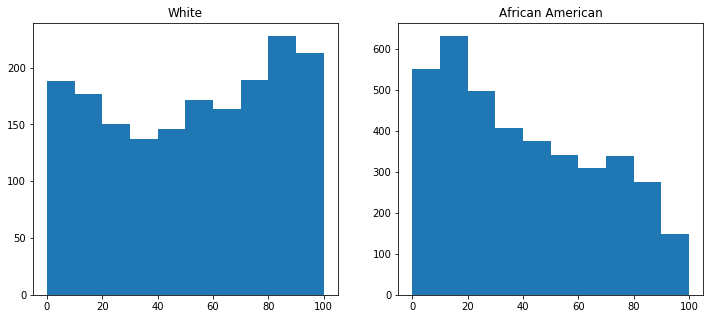

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("White")
plt.hist(predDf[predDf.truthLabel==1]['DenseAreaPercent'])

plt.subplot(122)
plt.title("African American")
plt.hist(predDf[predDf.truthLabel==0]['DenseAreaPercent'])


In [65]:
temp1['race'] = temp1.ImageName.apply(getRaceLabel)

/home/santhosr/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
temp1.head()

,ImageName,VolumetricBreastDensity,DenseAreaPercent,race
0,2036311_L_CC_1,5.2457,67.1112,1
1,2036311_L_MLO_1,10.5883,92.3699,1
2,2036311_L_MLO_2,5.1084,55.4036,1
3,2036311_R_CC_1,4.6236,39.2641,1
4,2036311_R_MLO_1,7.1716,85.2747,1


In [13]:
outputData = []
for i in range(8):
    bmi_min,bmi_max = 10 + 10*i, 10 + 10*(i+1)
    
    subDf = predDf[predDf.DenseAreaPercent.between(bmi_min,bmi_max)]
    
    whiteDf = subDf[subDf.truthLabel==1]
    aaDf = subDf[subDf.truthLabel==0]
    
    selectSize = min(len(whiteDf), len(aaDf))
    
    whiteDf = whiteDf[:selectSize]
    aaDf = aaDf[:selectSize]
    
    tempDf = pd.concat([whiteDf, aaDf])
    
    whiteAcc = np.round(accuracy_score(whiteDf.truthLabel, whiteDf.predLabel),2)
    aaAcc = np.round(accuracy_score(aaDf.truthLabel, aaDf.predLabel),2)
    
    acc = np.round(accuracy_score(tempDf.truthLabel,tempDf.predLabel),2)
    
    outputData.append([bmi_min, bmi_max, selectSize, acc, whiteAcc,aaAcc])

    
tempDf = pd.DataFrame(outputData)
tempDf.columns = ['Density_min','Density_max','numImages','Total Acc','White Acc','Black Acc']

tempDf
    
    
    
    

,Density_min,Density_max,numImages,Total Acc,White Acc,Black Acc
0,10,20,178,0.83,0.80,0.85
1,20,30,149,0.86,0.83,0.89
2,30,40,138,0.84,0.80,0.88
3,40,50,146,0.87,0.87,0.86
4,50,60,171,0.85,0.86,0.84
5,60,70,164,0.87,0.91,0.83
6,70,80,189,0.84,0.90,0.78
7,80,90,229,0.81,0.95,0.68


In [25]:
predDf.head()

,score0,score1,predLabel,ImageName,truthLabel,DummyID,BMI
0,0.005717,0.994283,1,75048084_R_CC_1,1,75048084,24.8
1,0.803633,0.196367,0,76876308_R_MLO_1,1,76876308,21.3
2,0.208912,0.791088,1,76750724_FOR-PROCESSING_L_CC_1,1,76750724,30.9
3,0.997835,0.002165,0,76809071_R_CC_1,0,76809071,33.3
4,0.929431,0.070569,0,75352509_L_MLO_1,0,75352509,18.3


In [24]:
df.head()

,DummyID,filename,train
0,4186820,FullRes/3/4186820_R_MLO_1.jpg,False
1,76789629,FullRes/2/76789629_R_MLO_1.jpg,False
2,75073273,FullRes/3/75073273_R_MLO_1.jpg,False
3,75577074,FullRes/2/75577074_L_CC_1.jpg,False
4,76671221,FullRes/2/76671221_L_CC_1.jpg,False


### Combined Modeling

In [5]:
df.head()

,DummyID,filename,train
0,4186820,FullRes/3/4186820_R_MLO_1.jpg,False
1,76789629,FullRes/2/76789629_R_MLO_1.jpg,False
2,75073273,FullRes/3/75073273_R_MLO_1.jpg,False
3,75577074,FullRes/2/75577074_L_CC_1.jpg,False
4,76671221,FullRes/2/76671221_L_CC_1.jpg,False


In [6]:
truth.head()

,Age,BMI,Density_Overall,DummyID,Medview_Race,ScreenDate
0,67.8,27.1,2.0,2508626,White,3/23/2011
1,58.8,25.7,2.0,2505738,White,6/2/2011
2,56.4,28.1,2.0,2547962,White,5/24/2011
3,51.7,31.8,2.0,2575490,White,5/6/2011
4,63.7,27.5,2.0,2591080,Other,5/5/2011


In [7]:
df['label'] = df.filename.apply(lambda x : getRaceLabel(x))

df['DummyID'] = df.filename.apply(lambda x : int(x.split("/")[-1].split("_")[0]))

In [8]:
def extractImageName(x):
    
    x = x.split("/")[-1]
    
    if "MLO" in x :
        return x[-11:-6]
    else:
        return x[-10:-6]
    
df['ImageName'] = df.filename.apply(lambda x : x.split("/")[-1].split(".")[0])

In [9]:
df.head()

,DummyID,filename,train,label,ImageName
0,4186820,FullRes/3/4186820_R_MLO_1.jpg,False,0,4186820_R_MLO_1
1,76789629,FullRes/2/76789629_R_MLO_1.jpg,False,1,76789629_R_MLO_1
2,75073273,FullRes/3/75073273_R_MLO_1.jpg,False,0,75073273_R_MLO_1
3,75577074,FullRes/2/75577074_L_CC_1.jpg,False,1,75577074_L_CC_1
4,76671221,FullRes/2/76671221_L_CC_1.jpg,False,0,76671221_L_CC_1


In [10]:
df = pd.merge(df, truth[['DummyID','Age','BMI']], on='DummyID', how='left')

#Removing instances without BMI
df = df.loc[~pd.isna(df.BMI)]

In [11]:
df.label.value_counts()

1    21264
0    18840
Name: label, dtype: int64

### Adding Volpara results

In [12]:
vol = pd.read_csv('VolparaResults.csv')

In [13]:
vol.head()

,ImageName,DummyID,BreastSide,MammoView,BreastVolumeCm3,VolumetricBreastDensity,DenseAreaPercent,ComputedBreastThickness,MaximumPercentDensityIn1Cm2Area,MaximumDenseVolumeIn1Cm2AreaInCm3
0,2036311_L_CC_1,2036311,Left,CC,551.8933,5.2457,67.1112,62.0,16.3976,1.047380
1,2036311_L_MLO_1,2036311,Left,MLO,638.1189,10.5883,92.3699,63.0,25.2581,1.639360
2,2036311_R_CC_1,2036311,Right,CC,468.4220,4.6236,39.2641,56.0,14.5975,0.842166
3,2036311_R_MLO_1,2036311,Right,MLO,712.3350,7.1716,85.2747,70.0,20.8634,1.504580
4,2043167_L_CC_1,2043167,Left,CC,1441.5069,5.9439,33.3823,70.0,13.7715,0.993140


In [14]:
def extractPatientInfo(x):
        
    x = x.sort_values(['MammoView','BreastSide'])
    
    out =  np.concatenate(
        [x.BreastVolumeCm3.values,
         x.DenseAreaPercent.values
        ])
    
    return out
    


out = vol.groupby('DummyID').apply(lambda x : extractPatientInfo(x))

out = out.reset_index()

temp = out[0].apply(pd.Series)

out.drop(0, inplace = True, axis = 1)

colNames = []
varSelect = ['BreastVolumeCm3','DenseAreaPercent']

for i in range(len(varSelect)):
    
    colNames.append(varSelect[i]+'L_CC')
    colNames.append(varSelect[i]+'R_CC')
    colNames.append(varSelect[i]+'L_MLO')
    colNames.append(varSelect[i]+'R_MLO')
    
temp.columns = colNames

vol = pd.concat([out, temp],axis = 1)

In [15]:
vol.head()

,DummyID,BreastVolumeCm3L_CC,BreastVolumeCm3R_CC,BreastVolumeCm3L_MLO,BreastVolumeCm3R_MLO,DenseAreaPercentL_CC,DenseAreaPercentR_CC,DenseAreaPercentL_MLO,DenseAreaPercentR_MLO
0,2035300,1098.4721,1092.6537,1370.6361,1200.6639,39.8211,57.0010,43.3291,44.0651
1,2036311,551.8933,468.4220,638.1189,712.3350,67.1112,39.2641,92.3699,85.2747
2,2036695,605.6775,570.0239,689.7860,706.6826,71.8886,70.3447,66.2514,71.2205
3,2042193,654.6834,627.2421,676.7831,718.5041,87.1291,86.7084,89.3347,91.0358
4,2043167,1441.5069,1414.7118,1514.2860,1280.8693,33.3823,10.0514,14.2366,17.0593


### Patient Level Analysis

In [16]:
df.head()

,DummyID,filename,train,label,ImageName,Age,BMI
0,4186820,FullRes/3/4186820_R_MLO_1.jpg,False,0,4186820_R_MLO_1,45.0,22.6
1,76789629,FullRes/2/76789629_R_MLO_1.jpg,False,1,76789629_R_MLO_1,70.9,24.7
2,75073273,FullRes/3/75073273_R_MLO_1.jpg,False,0,75073273_R_MLO_1,36.3,27.3
3,75577074,FullRes/2/75577074_L_CC_1.jpg,False,1,75577074_L_CC_1,73.1,19.2
4,75577074,FullRes/2/75577074_L_CC_1.jpg,False,1,75577074_L_CC_1,73.1,19.7


In [17]:

trainPatients = pd.unique(df.loc[df.train==False]['DummyID'])
validPatients = pd.unique(df.loc[df.train==True]['DummyID'])

dropList = []
for i in range(len(trainPatients)):
    d = df[df.DummyID == trainPatients[i]]
    if len(d)!=4:
        dropList.append(trainPatients[i])

trainPatients = list(set(trainPatients).difference(set(dropList)))


dropList = []
for i in range(len(validPatients)):
    d = df[df.DummyID == validPatients[i]]
    if len(d)!=4:
        dropList.append(validPatients[i])

validPatients = list(set(validPatients).difference(set(dropList)))    
    

In [18]:
len(trainPatients)

7029

In [19]:
len(validPatients)

1785

#### With Patient Data Alone

In [20]:
### Train data
trainData = []
trainLabel = []
for i in range(len(trainPatients)):
    
    r = df[df.DummyID==trainPatients[i]]
    try:
        val =  np.concatenate([np.array([r.iloc[0]['Age'],r.iloc[0]['BMI']]) , vol[vol.DummyID==trainPatients[i]].iloc[0,1:].values])

        trainData.append(val)
        trainLabel.append(r.iloc[0]['label'])
    except:
        print("Missing data for {}".format(trainPatients[i]))
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel)

Missing data for 3719366
Missing data for 3723710
Missing data for 3708759
Missing data for 3708932
Missing data for 3710225
Missing data for 3727080
Missing data for 3711618
Missing data for 3728125
Missing data for 3728404
Missing data for 3728425
Missing data for 3728751
Missing data for 3729021
Missing data for 3715282
Missing data for 3715638
Missing data for 3715835
Missing data for 3715907
Missing data for 3716244
Missing data for 3716653
Missing data for 3716896
Missing data for 3716934
Missing data for 3718105
Missing data for 3718223
Missing data for 3718428


In [21]:
### Valid data
validData = []
validLabel = []
for i in range(len(validPatients)):
    
    r = df[df.DummyID==validPatients[i]]
    try:
        val =  np.concatenate([np.array([r.iloc[0]['Age'],r.iloc[0]['BMI']]) , vol[vol.DummyID==validPatients[i]].iloc[0,1:].values])
        
        validData.append(val)
        validLabel.append(r.iloc[0]['label'])
    except:
        print("Missing data for {}".format(validPatients[i]))
        
    
validData = np.array(validData)
validLabel = np.array(validLabel)

Missing data for 3727468
Missing data for 3715236
Missing data for 3715651
Missing data for 3716856
Missing data for 3708897


In [22]:
#Doing missing imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
trainData = imputer.fit_transform(trainData)

validData = imputer.transform(validData)

In [23]:
rfModel = RandomForestClassifier(n_estimators=300, max_depth=8)
rfModel.fit(trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
pred = rfModel.predict(validData)
accuracy_score(pred, validLabel)

0.6415730337078651

In [25]:
pred = rfModel.predict(trainData)
accuracy_score(pred, trainLabel)

0.7109620325435341

#### With CNN prediction inputs

In [26]:
#Loading train data predictions
trainPredDf = pd.read_csv('model10_1_TrainPredictions.csv')

if 'imageName' in trainPredDf.columns:
    trainPredDf.rename(columns={'imageName':'ImageName'},inplace=True)

    
trainPredDf['DummyID'] = trainPredDf.ImageName.apply(lambda x : int(x.split("_")[0]))

trainPredDf = pd.merge(trainPredDf, truth[['DummyID','BMI']], on='DummyID',how='left')
    

trainPredDf['train']=False
predDf['train']=True

#Combining test and train data predictions
totalPredDf = pd.concat([predDf,trainPredDf])

totalPredDf.head()

totalPredDf['side'] = totalPredDf.ImageName.apply(lambda x : x[-6:] if "CC" in x else x[-7:] )



def extractPatientPred(x):
    
    x = x.sort_values('side')
    x = x.drop_duplicates('ImageName')
    
    return x.score1.values

patientPred = totalPredDf.groupby('DummyID').apply(extractPatientPred)

patientPred = patientPred.reset_index()

temp = patientPred[0].apply(pd.Series)

patientPred.drop(0, inplace = True, axis =1)

patientPred = pd.concat([patientPred,temp], axis = 1)

,score0,score1,predLabel,imageName,truthLabel
0,0.893288,0.106712,0,4186820_R_MLO_1,0
1,0.007363,0.992637,1,76789629_R_MLO_1,1
2,0.846092,0.153908,0,75073273_R_MLO_1,0
3,0.049612,0.950388,1,75577074_L_CC_1,1
4,0.553521,0.446479,0,76671221_L_CC_1,0


In [109]:
patientPred.head()

,DummyID,0,1,2,3
0,2035300,0.823334,0.887951,0.997800,0.878106
1,2036311,0.997292,0.997214,0.998432,0.949211
2,2036695,0.831547,0.831207,0.973570,0.799288
3,2042193,0.956624,0.956276,0.700152,0.755652
4,2043167,0.876202,0.784373,0.998109,0.920610


In [112]:
### Train data
trainData = []
trainLabel = []
for i in range(len(trainPatients)):
    
    
    r = df[df.DummyID==trainPatients[i]]
    r = r.sort_values('ImageName')
    
    try:
        val =  np.array([r.iloc[0]['Age']] + [r.iloc[0]['BMI']])
        
        volVal = vol[vol.DummyID==trainPatients[i]].iloc[0,1:].values

        predVal  = patientPred[patientPred.DummyID==trainPatients[i]].iloc[0]

        val = np.concatenate([val, volVal, predVal])

        trainData.append(val)   
        trainLabel.append(r.iloc[0]['label'])
    except:
        print("Missing data for {}".format(trainPatients[i]))
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel)

Missing data for 3719366
Missing data for 3723710
Missing data for 3708759
Missing data for 3708932
Missing data for 3710225
Missing data for 3727080
Missing data for 3711618
Missing data for 3728125
Missing data for 3728404
Missing data for 3728425
Missing data for 3728751
Missing data for 3729021
Missing data for 3715282
Missing data for 3715638
Missing data for 3715835
Missing data for 3715907
Missing data for 3716244
Missing data for 3716653
Missing data for 3716896
Missing data for 3716934
Missing data for 3718105
Missing data for 3718223
Missing data for 3718428


In [113]:
### valid data
validData = []
validLabel = []
for i in range(len(validPatients)):
    
    
    r = df[df.DummyID==validPatients[i]]
    r = r.sort_values('ImageName')
    
    try:
        val =  np.array([r.iloc[0]['Age']] + [r.iloc[0]['BMI']])
        
        volVal = vol[vol.DummyID==validPatients[i]].iloc[0,1:].values

        predVal  = patientPred[patientPred.DummyID==validPatients[i]].iloc[0]

        val = np.concatenate([val, volVal, predVal])

        validData.append(val)   
        validLabel.append(r.iloc[0]['label'])
    except:
        print("Missing data for {}".format(validPatients[i]))
    
validData = np.array(validData)
validLabel = np.array(validLabel)

Missing data for 3727468
Missing data for 3715236
Missing data for 3715651
Missing data for 3716856
Missing data for 3708897


In [114]:
#Doing missing imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
trainData = imputer.fit_transform(trainData)

validData = imputer.transform(validData)

In [118]:
rfModel = RandomForestClassifier(n_estimators=300, max_depth=6)
rfModel.fit(trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
pred = rfModel.predict(validData)
accuracy_score(pred, validLabel)

0.8898876404494382

In [120]:
pred = rfModel.predict(trainData)
accuracy_score(pred, trainLabel)

0.9584641735655153

In [121]:
rfModel.feature_importances_

array([0.003113, 0.011625, 0.003694, 0.003127, 0.00348 , 0.003058, 0.002917, 0.002843, 0.00243 , 0.00241 , 0.002687,
       0.178223, 0.277924, 0.21563 , 0.286838])

In [142]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(max_depth=4)
dtModel.fit(trainData, trainLabel)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
pred = dtModel.predict(validData)
accuracy_score(pred, validLabel)

0.8780898876404495

In [144]:
pred = dtModel.predict(trainData)
accuracy_score(pred, trainLabel)

0.9447616328860976

#### With Image Data

In [44]:
### Train data
trainData = []
trainLabel = []
for i in range(len(trainPatients)):
    
    r = df[df.DummyID==trainPatients[i]]
    r = r.sort_values('ImageName')
    
    val =  [r.iloc[0]['Age']] + [r.iloc[0]['BMI']]
    
    imageData = []
    for i in range(4):
        feat  = list(np.load(os.path.join(trainFolder,r.iloc[i]['ImageName']+'.npy')).reshape(-1))
        imageData = imageData + feat
    
    trainData.append(val+imageData)   #add val here for confounding vars
    trainLabel.append(r.iloc[0]['label'])
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel)

In [45]:
### valid data
validData = []
validLabel = []
for i in range(len(validPatients)):
    
    r = df[df.DummyID==validPatients[i]]
    r = r.sort_values('ImageName')
    
    val =       [r.iloc[0]['Age']] + [r.iloc[0]['BMI']]
    
    imageData = []
    for i in range(4):
        feat  = list(np.load(os.path.join(validFolder,r.iloc[i]['ImageName']+'.npy')).reshape(-1))
        imageData = imageData + feat
    
    validData.append(val +imageData )
    validLabel.append(r.iloc[0]['label'])
    
validData = np.array(validData)
validLabel = np.array(validLabel)

In [51]:
### MODELING


rfModel = RandomForestClassifier(n_estimators=300, max_depth=12)
rfModel.fit(trainData, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
pred = rfModel.predict(validData)
accuracy_score(pred, validLabel)

0.8886198547215496

In [53]:
roc_auc_score(validLabel,pred)

0.8886315666041276

In [54]:
# CV Testing

scoreList = []

for i in tqdm(range(10)):
    rfModel = RandomForestClassifier(n_estimators=300, max_depth=10)
    rfModel.fit(trainData, trainLabel)
    
    pred = rfModel.predict(validData)
    score = roc_auc_score(pred, validLabel)
    
    scoreList.append(score)
    
print(np.mean(scoreList))
    
    

100%|██████████| 10/10 [06:07<00:00, 36.76s/it]

0.8878928206000325


### Keras Modeling

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

inputShape = (2050,)

In [72]:
model = Sequential()


model.add(Dense(1024, activation='relu',input_shape=inputShape))
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [73]:
epochs = 10

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(trainData, trainLabel,
          batch_size=50,
          epochs=epochs,
          verbose=1,
          validation_data=(validData, validLabel))

Train on 6693 samples, validate on 1652 samples
Epoch 1/10
6693/6693 [==============================] - 1s 207us/step - loss: 0.4066 - acc: 0.8921 - val_loss: 0.3446 - val_acc: 0.8801
Epoch 2/10
6693/6693 [==============================] - 1s 123us/step - loss: 0.2402 - acc: 0.9228 - val_loss: 0.3307 - val_acc: 0.8886
Epoch 3/10
6693/6693 [==============================] - 1s 124us/step - loss: 0.2030 - acc: 0.9355 - val_loss: 0.3084 - val_acc: 0.8898
Epoch 4/10
6693/6693 [==============================] - 1s 124us/step - loss: 0.1839 - acc: 0.9381 - val_loss: 0.3700 - val_acc: 0.8874
Epoch 5/10
6693/6693 [==============================] - 1s 123us/step - loss: 0.1763 - acc: 0.9398 - val_loss: 0.3109 - val_acc: 0.8959
Epoch 6/10
6693/6693 [==============================] - 1s 125us/step - loss: 0.1653 - acc: 0.9474 - val_loss: 0.3416 - val_acc: 0.8941
Epoch 7/10
6693/6693 [==============================] - 1s 125us/step - loss: 0.1504 - acc: 0.9501 - val_loss: 0.3879 - val_acc: 0.8953


#### Model 2

In [70]:
model = Sequential()


model.add(Dense(1024, activation='relu',input_shape=inputShape))
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

In [71]:
epochs = 10

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(trainData, trainLabel,
          batch_size=50,
          epochs=epochs,
          verbose=1,
          validation_data=(validData, validLabel))

Train on 6693 samples, validate on 1652 samples
Epoch 1/10
6693/6693 [==============================] - 1s 181us/step - loss: 0.3685 - acc: 0.9000 - val_loss: 0.3670 - val_acc: 0.8729
Epoch 2/10
6693/6693 [==============================] - 1s 110us/step - loss: 0.2278 - acc: 0.9269 - val_loss: 0.3679 - val_acc: 0.8820
Epoch 3/10
6693/6693 [==============================] - 1s 110us/step - loss: 0.2192 - acc: 0.9311 - val_loss: 0.3391 - val_acc: 0.8826
Epoch 4/10
6693/6693 [==============================] - 1s 112us/step - loss: 0.2052 - acc: 0.9362 - val_loss: 0.3450 - val_acc: 0.8874
Epoch 5/10
6693/6693 [==============================] - 1s 110us/step - loss: 0.1953 - acc: 0.9353 - val_loss: 0.3355 - val_acc: 0.8856
Epoch 6/10
6693/6693 [==============================] - 1s 109us/step - loss: 0.1718 - acc: 0.9432 - val_loss: 0.3712 - val_acc: 0.8935
Epoch 7/10
6693/6693 [==============================] - 1s 110us/step - loss: 0.1718 - acc: 0.9450 - val_loss: 0.4069 - val_acc: 0.8929


### Making predictions for single images

In [37]:
from imageio import imread

img = imread('/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/75218338_R_CC_1.jpg')

In [63]:
df.head()

,DummyID,filename,train
0,75218338,FullRes/3/75218338_R_CC_1.jpg,True
1,75145018,FullRes/2/75145018_R_MLO_1.jpg,True
2,75913007,PennExtra_3500/75913007_FOR-PROCESSING_L_CC_1.jpg,False
3,4632661,FullRes/2/4632661_R_CC_1.jpg,True
4,4011669,PennExtra_3500/4011669_FOR-PROCESSING_R_CC_1.jpg,False


In [72]:
df1 = pd.DataFrame([['withLargerDataset/75218338_R_CC_1.jpg',False],['withLargerDataset/75218338_R_CC_11.jpg',False],['withLargerDataset/75218338_R_CC_12.jpg',True],['withLargerDataset/75218338_R_CC_13.jpg',False],['withLargerDataset/75218338_R_CC_14.jpg',True]])
df1.columns = ['filename','train']
df1.head()

,filename,train
0,withLargerDataset/75218338_R_CC_1.jpg,False
1,withLargerDataset/75218338_R_CC_11.jpg,False
2,withLargerDataset/75218338_R_CC_12.jpg,True
3,withLargerDataset/75218338_R_CC_13.jpg,False
4,withLargerDataset/75218338_R_CC_14.jpg,True


In [36]:
data.norm

functools.partial(<function _normalize_batch at 0x7f82240b1950>, mean=tensor([0.7549, 0.7549, 0.7549]), std=tensor([0.3382, 0.3382, 0.3382]), do_x=True, do_y=False)

In [31]:
data.valid_ds.items[0]

'/home/santhosr/Documents/Birad/ProcessedData/./FullRes/3/75218338_R_CC_1.jpg'

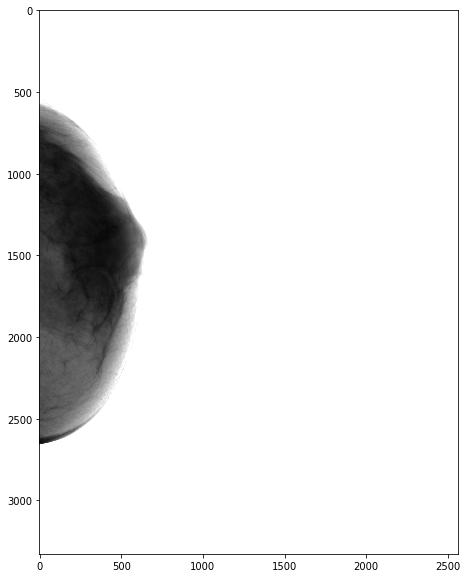

In [35]:
plotImageData('75218338_R_CC_1')

In [13]:
p=learn.predict(data.valid_ds.x[0])

In [14]:
p

(Category 1, tensor(1), tensor([0.0074, 0.9926]))

In [15]:
pred

tensor([[-2.0954,  2.8065]], device='cuda:0', grad_fn=<AddmmBackward>)

In [88]:
data.stats

[tensor([0.7549, 0.7549, 0.7549]), tensor([0.3382, 0.3382, 0.3382])]

In [164]:
import torch
import torchvision

from torchvision.transforms import ToTensor, Resize, Normalize

tfms = torchvision.transforms.Compose([
    Resize([256,256]),
    ToTensor(),
    Normalize(data.stats[0],data.stats[1])
    
    
])




In [165]:

img = PIL.Image.open('/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/75218338_R_CC_1.jpg').convert('RGB')

p = tfms(img)

In [100]:


#Creates the FastAI Dataset
data = ImageItemList.from_df(df=df,path='/home/santhosr/Documents/Birad/ProcessedData/', cols='filename').split_from_df(col='train').label_from_func(getRaceLabel).transform(get_transforms(),size=256).databunch(bs=50).normalize()
print("Dataset created")

Dataset created


In [101]:
q=data.valid_ds.x[0]

In [117]:
p.shape

torch.Size([3, 256, 256])

In [131]:
e=data.one_item(data.valid_ds.x[0])

In [118]:
e[0].shape

torch.Size([1, 3, 256, 256])

In [119]:
p[0,1:10,1:10]

tensor([[0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247]])

In [120]:
e[0][0,0,1:10,1:10]

tensor([[0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247],
        [0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247, 0.7247]],
       device='cuda:0')

In [121]:
p.unsqueeze(0).shape

torch.Size([1, 3, 256, 256])

In [163]:
learn.model(p.unsqueeze(0).cuda())

tensor([[-2.6960,  2.6999]], device='cuda:0', grad_fn=<AddmmBackward>)

In [123]:
learn.model(p.unsqueeze(0).cuda())

tensor([[-2.6956,  2.6995]], device='cuda:0', grad_fn=<AddmmBackward>)

In [132]:
learn.model(e[0].cuda())

tensor([[-2.0954,  2.8065]], device='cuda:0', grad_fn=<AddmmBackward>)

In [125]:
data.tfms

[]

In [135]:
e[0]

tensor([[[[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          ...,
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247]],

         [[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          ...,
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247]],

         [[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
          [0.7247, 0.7247, 0.7247,  ..., 0

In [136]:
p

tensor([[[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         ...,
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247]],

        [[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         ...,
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247]],

        [[0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.7247],
         [0.7247, 0.7247, 0.7247,  ..., 0.7247, 0.7247, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


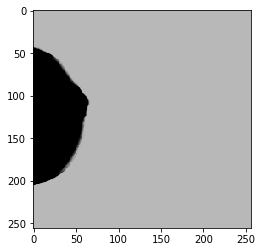

In [140]:
plt.imshow(np.transpose(p.numpy(),[1,2,0]))

In [166]:
np.max(p.numpy())

0.72472656

In [167]:
np.min(p.numpy())

-2.1049395

In [145]:
np.max(e[0].cpu().numpy())

0.72472656

In [147]:
np.min(e[0].cpu().numpy())

-2.131105

TypeError: 'module' object is not callable

In [169]:
from fastai.vision import Image

In [170]:
Image('/home/santhosr/Documents/Birad/FastAI/RaceClassification/withLargerDataset/75218338_R_CC_1.jpg')

AttributeError: 'str' object has no attribute 'shape'

AttributeError: 'str' object has no attribute 'cpu'

AttributeError: 'str' object has no attribute 'cpu'

In [171]:
help(Image)

Help on class Image in module fastai.vision.image:

class Image(fastai.core.ItemBase)
 |  Support applying transforms to image data in `px`.
 |  
 |  Method resolution order:
 |      Image
 |      fastai.core.ItemBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, px:torch.Tensor)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  affine(self, func:Callable[[Dict[str, Any]], torch.Tensor], *args, **kwargs) -> 'Image'
 |      Equivalent to `image.affine_mat = image.affine_mat @ func()`.
 |  
 |  apply_tfms(self, tfms:Union[Callable, Collection[Callable]], do_resolve:bool=True, xtra:Union[Dict[Callable, dict], NoneType]=None, size:Union[int, Tuple[int, int, int], NoneType]=None, resize_method:fastai.vision.image.ResizeMethod=<ResizeMethod.CROP: 1>, mult:int=32, padding_mode:str='reflection', mode:str='bilinear') -> torch.Tensor
 |      Apply all `tfms` to the `Image`, if `do_re

In [172]:
help(type(Image))

Help on class type in module builtins:

class type(object)
 |  type(object_or_name, bases, dict)
 |  type(object) -> the object's type
 |  type(name, bases, dict) -> a new type
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(...)
 |      __dir__() -> list
 |      specialized __dir__ implementation for types
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __instancecheck__(...)
 |      __instancecheck__() -> bool
 |      check if an object is an instance
 |  
 |  __new__(*args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __prepare__(...)
 |      __prepare__() -> dict
 |      used to create the namespace for the class statement
 |  
 